## DSCI 552 : HomeWork 6

### Name: Jayantraj CS (USC ID: 3993-1362-35)

In [237]:
# Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns
import random
import math
import time as t
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold


warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## *Question 1.) Supervised, Semi-Supervised, and Unsupervised Learning*

## *Question 1a.) Download the Breast Cancer Wisconsin (Diagnostic) Data Set*

In [75]:
#Downloading and processing the dataset.

data = pd.read_csv("../data/wdbc.data.txt", header=None)
cols = ['id','class_label']
for i in range(1,31):
    cols.append('attribute_'+str(i))
data.columns=cols
data.replace({'B' : 0, 'M' : 1}, inplace=True)

In [76]:
# Displays the first 4 rows of the dataset.
data.head(4)

,id,class_label,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [77]:
# The dataset has 569 rows and 32 columns.
data.shape

(569, 32)

In [78]:
# The dataset has 357 Bengin class labels and 212 malignant class labels.
data['class_label'].value_counts()

0    357
1    212
Name: class_label, dtype: int64

## *Question 1b.) Monte-Carlo Simulation*

## *Question 1b.i) Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.*

In [79]:
def get_train_test_data(data,rand):
    np.random.seed(rand)
    index_of_malignant,=np.where(data['class_label']==1)
    malignant_test_index=np.random.choice(index_of_malignant,round(len(index_of_malignant)*0.2),replace=False)
    index_of_benign,=np.where(data['class_label']==0)
    benign_test_index=np.random.choice(index_of_benign,round(len(index_of_benign)*0.2),replace=False)
    all_test_indices = np.concatenate([malignant_test_index,benign_test_index])
    all_train_indices =[]
    for i in range(data.shape[0]):
        if i not in all_test_indices:
            all_train_indices.append(i)
    all_train_indices=np.array(all_train_indices)
    return data.iloc[all_train_indices, 2:].copy(),data.iloc[all_train_indices, 1].copy(),data.iloc[all_test_indices, 2:].copy(),data.iloc[all_test_indices, 1].copy()
    

# verified that split is correct
train_data_x,train_data_y,test_data_x,test_data_y = get_train_test_data(data,1234)

In [81]:
summary={}

In [124]:
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

def print_details(truth_values, predicted_values, probablities, temp_dict):
    accuracy = temp_dict['accuracy']
    print('Accuracy is',accuracy)
    confus_matrix = confusion_matrix(truth_values, predicted_values)
    print("Confusion Matrix ")
    print(confus_matrix)
    false_positive_rate,true_positive_rate , _ = roc_curve(truth_values,probablities, pos_label=1)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    fig, axes = plt.subplots(figsize=(16, 8))
    axes.plot(false_positive_rate, true_positive_rate, label='Area %f'%roc_auc)
    axes.plot([0, 1], [0, 1], "--",color='green')
    axes.legend()
    axes.set_ylabel("TPR (True Positive Rate)")
    axes.set_xlabel("FPR (False Positive Rate)")
    axes.set_title("ROC Curve")
    plt.show()
    

def monte_carlo_l1_penalized_svm(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r):
    
    start = t.time()
    
    tuned_parameters = {'C' : np.logspace(1, 5, 10)}
    
    dict_ = {'param_grid' : tuned_parameters,'scoring' : 'f1_weighted','n_jobs' : -1}
    
    for i in range(30):
        dict_['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        train_data_x,train_data_y,test_data_x,test_data_y = get_train_test_data(data,i)
        
        norm = Normalizer()
        train_data_x = norm.fit_transform(train_data_x)
        test_data_x = norm.transform(test_data_x)
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False,max_iter = 100000), **dict_)
        clf.fit(train_data_x, train_data_y)
        
        predicted_y_prob_train = clf.decision_function(train_data_x)
        predicted_y_train = clf.predict(train_data_x)
        train_details = classification_report(train_data_y, predicted_y_train, output_dict=True)
        fpr, tpr,_ = roc_curve(train_data_y, predicted_y_train, pos_label=1)
        temp_dict_train={'accuracy':train_details['accuracy'],'precision':train_details['weighted avg']['precision'],'recall':train_details['weighted avg']['recall'],'f1_score':train_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        train_r=train_r.append(temp_dict_train, ignore_index=True)
        
        predicted_y_prob_test = clf.decision_function(test_data_x)
        predicted_y_test = clf.predict(test_data_x)
        test_details = classification_report(test_data_y, predicted_y_test, output_dict=True)
        fpr, tpr,_ = roc_curve(test_data_y, predicted_y_test, pos_label=1)
        temp_dict_test={'accuracy':test_details['accuracy'],'precision':test_details['weighted avg']['precision'],'recall':test_details['weighted avg']['recall'],'f1_score':test_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        test_r=test_r.append(temp_dict_test, ignore_index=True)
        
        print('Iteration: ',i+1)
        print('Train Accuracy: ',temp_dict_train['accuracy'],'Test Accuracy: ',temp_dict_test['accuracy'])
        
        print("Best Hyper-Parameters found:")
        print(clf.best_params_, "\n")
    train_r = train_r.apply(lambda p: p.mean(), axis=0)
    test_r = test_r.apply(lambda p: p.mean(), axis=0)
    
    end =t.time()
    print("Time Taken for Execution:",end-start)
    
    return train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_r,test_r

In [125]:
col_data =['accuracy', 'precision', 'recall', 'f1_score', 'AUC']
train_r,test_r  = pd.DataFrame(columns=col_data),pd.DataFrame(columns=col_data)
train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_results,test_results=monte_carlo_l1_penalized_svm(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r)

Iteration:  1
Train Accuracy:  0.9846491228070176 Test Accuracy:  0.9557522123893806
Best Hyper-Parameters found:
{'C': 35938.13663804626} 

Iteration:  2
Train Accuracy:  0.9824561403508771 Test Accuracy:  0.9646017699115044
Best Hyper-Parameters found:
{'C': 12915.496650148827} 

Iteration:  3
Train Accuracy:  0.9868421052631579 Test Accuracy:  0.9646017699115044
Best Hyper-Parameters found:
{'C': 12915.496650148827} 

Iteration:  4
Train Accuracy:  0.9890350877192983 Test Accuracy:  0.9734513274336283
Best Hyper-Parameters found:
{'C': 12915.496650148827} 

Iteration:  5
Train Accuracy:  0.9824561403508771 Test Accuracy:  0.9646017699115044
Best Hyper-Parameters found:
{'C': 4641.588833612777} 

Iteration:  6
Train Accuracy:  1.0 Test Accuracy:  0.9557522123893806
Best Hyper-Parameters found:
{'C': 100000.0} 

Iteration:  7
Train Accuracy:  0.9956140350877193 Test Accuracy:  0.9292035398230089
Best Hyper-Parameters found:
{'C': 100000.0} 

Iteration:  8
Train Accuracy:  0.9802631578


Average Scores After performing Monte Carlo 30 times

Details About Training Data
Accuracy is 0.9868421052631579
Confusion Matrix 
[[283   3]
 [  3 167]]


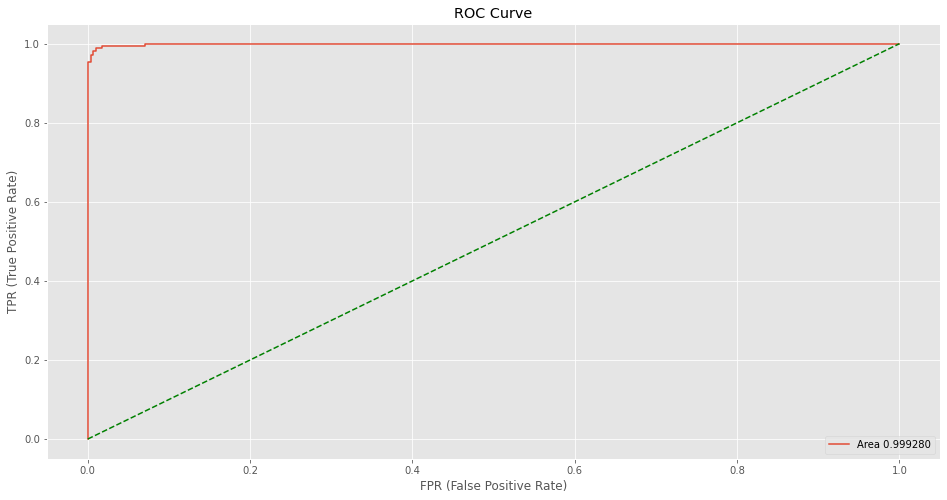


Details About Test Data
Accuracy is 0.9734513274336283
Confusion Matrix 
[[69  2]
 [ 1 41]]


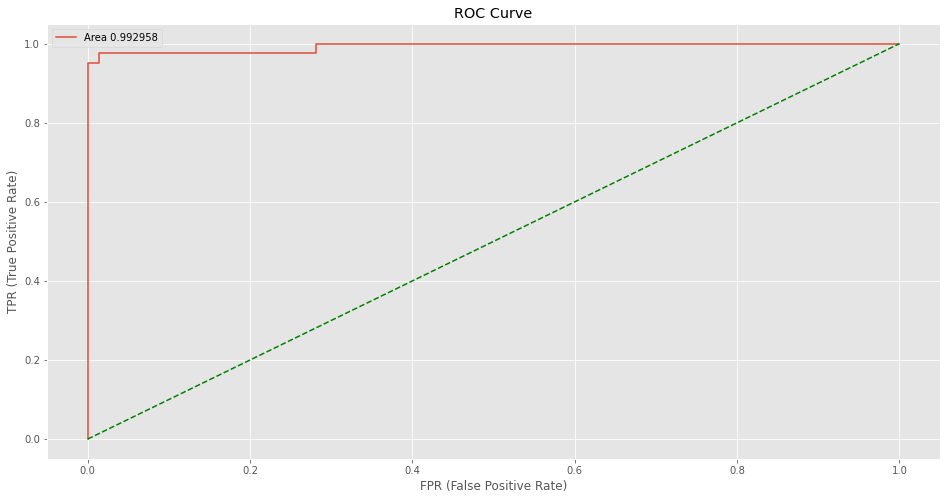


Overall Summary(After taking Means)
          accuracy  precision    recall  f1_score       AUC
Training  0.984137   0.984163  0.984137  0.984118  0.981907
Test      0.958702   0.959306  0.958702  0.958703  0.955952


In [126]:
print('\nAverage Scores After performing Monte Carlo 30 times')
print('\nDetails About Training Data')
    
print_details(train_data_y, predicted_y_train, predicted_y_prob_train, temp_dict_train)
    
print('\nDetails About Test Data')
print_details(test_data_y, predicted_y_test, predicted_y_prob_test, temp_dict_test)

print('\nOverall Summary(After taking Means)')
overall_result = pd.concat([train_results, test_results], axis=1).T
overall_result = overall_result.set_index(pd.Series(['Training', 'Test']))
print(overall_result)
summary['supervised_l1_penalized_svm']=overall_result


## *Question 1b.ii) Semi-Supervised Learning/ Self-training*

In [144]:
# 50% of positive class and 50% of the negative class is made as labeled data
def get_labeled_unlabeled_data(train_data_x,train_data_y):
    labeled_index_positive_class,=np.where(train_data_y==1)
    labeled_index_negative_class,=np.where(train_data_y==0)
    labeled_positive_class=np.random.choice(labeled_index_positive_class,round(len(labeled_index_positive_class)*0.5),replace=False)
    labeled_negative_class=np.random.choice(labeled_index_negative_class,round(len(labeled_index_negative_class)*0.5),replace=False)
    labeled_indices = np.concatenate([labeled_positive_class,labeled_negative_class])
    unlabeled_indices=[]
    for i in range(train_data_x.shape[0]):
        if i not in labeled_indices:
            unlabeled_indices.append(i)
    return train_data_x[labeled_indices],train_data_y.iloc[labeled_indices],train_data_x[unlabeled_indices],train_data_y.iloc[unlabeled_indices]



In [152]:

def semi_supervised_learning_svm(train_data_x,train_data_y,dict_):
    labeled_data_x,labeled_data_y,unlabeled_data_x,unlabeled_data_y=get_labeled_unlabeled_data(train_data_x,train_data_y)
    labeled_data_x,labeled_data_y,unlabeled_data_x,unlabeled_data_y=labeled_data_x.tolist(),labeled_data_y.tolist(),unlabeled_data_x.tolist(),unlabeled_data_y.to_numpy().tolist()
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False,max_iter = 50000), **dict_)
    clf.fit(labeled_data_x, labeled_data_y)
    
    while len(unlabeled_data_x)>0:

        results = clf.decision_function(unlabeled_data_x)
        
        sorted_indices = sorted([i for i in range(len(unlabeled_data_x))],key=lambda p: abs(results[p]))
    
        unlabeled_data_x = [unlabeled_data_x[i] for i in sorted_indices]
        
        unlabeled_data_y = [unlabeled_data_y[i] for i in sorted_indices]
        
        labeled_data_x.append(unlabeled_data_x.pop())
        labeled_data_y.append(unlabeled_data_y.pop())
        clf.best_estimator_.fit(labeled_data_x, labeled_data_y)
    
    return clf
        
  

In [153]:
def monte_carlo_semi_supervised_svm(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r):
    start = t.time()
    
    tuned_parameters = {'C' : np.logspace(1, 5, 10)}
    dict_ = {'param_grid' : tuned_parameters,'scoring' : 'f1_weighted','n_jobs' : -1}
    
    for i in range(30):
        dict_['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        train_data_x,train_data_y,test_data_x,test_data_y = get_train_test_data(data,i)
        
        norm = Normalizer()
        train_data_x = norm.fit_transform(train_data_x)
        test_data_x = norm.transform(test_data_x)
        
        clf = semi_supervised_learning_svm(train_data_x,train_data_y,dict_)
        
        predicted_y_prob_train = clf.decision_function(train_data_x)
        predicted_y_train = clf.predict(train_data_x)
        train_details = classification_report(train_data_y, predicted_y_train, output_dict=True)
        fpr, tpr,_ = roc_curve(train_data_y, predicted_y_train, pos_label=1)
        temp_dict_train={'accuracy':train_details['accuracy'],'precision':train_details['weighted avg']['precision'],'recall':train_details['weighted avg']['recall'],'f1_score':train_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        train_r=train_r.append(temp_dict_train, ignore_index=True)
        
        predicted_y_prob_test = clf.decision_function(test_data_x)
        predicted_y_test = clf.predict(test_data_x)
        test_details = classification_report(test_data_y, predicted_y_test, output_dict=True)
        fpr, tpr,_ = roc_curve(test_data_y, predicted_y_test, pos_label=1)
        temp_dict_test={'accuracy':test_details['accuracy'],'precision':test_details['weighted avg']['precision'],'recall':test_details['weighted avg']['recall'],'f1_score':test_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        test_r=test_r.append(temp_dict_test, ignore_index=True)
        
        print('Iteration: ',i+1)
        print('Train Accuracy: ',temp_dict_train['accuracy'],'Test Accuracy: ',temp_dict_test['accuracy'])
        
        print("Best Hyper-Parameters found:")
        print(clf.best_params_, "\n")
    train_r = train_r.apply(lambda p: p.mean(), axis=0)
    test_r = test_r.apply(lambda p: p.mean(), axis=0)
    
    end =t.time()
    print("Time Taken for Execution:",end-start)
    
    return train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_r,test_r


In [154]:
col_data =['accuracy', 'precision', 'recall', 'f1_score', 'AUC']
train_r,test_r  = pd.DataFrame(columns=col_data),pd.DataFrame(columns=col_data)
train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_results,test_results=monte_carlo_semi_supervised_svm(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r)

Iteration:  1
Train Accuracy:  0.9605263157894737 Test Accuracy:  0.9823008849557522
Best Hyper-Parameters found:
{'C': 599.4842503189409} 

Iteration:  2
Train Accuracy:  0.9868421052631579 Test Accuracy:  0.9646017699115044
Best Hyper-Parameters found:
{'C': 35938.13663804626} 

Iteration:  3
Train Accuracy:  0.956140350877193 Test Accuracy:  0.9646017699115044
Best Hyper-Parameters found:
{'C': 599.4842503189409} 

Iteration:  4
Train Accuracy:  0.993421052631579 Test Accuracy:  0.9823008849557522
Best Hyper-Parameters found:
{'C': 35938.13663804626} 

Iteration:  5
Train Accuracy:  0.9627192982456141 Test Accuracy:  0.9646017699115044
Best Hyper-Parameters found:
{'C': 599.4842503189409} 

Iteration:  6
Train Accuracy:  0.9802631578947368 Test Accuracy:  0.9734513274336283
Best Hyper-Parameters found:
{'C': 4641.588833612777} 

Iteration:  7
Train Accuracy:  0.9978070175438597 Test Accuracy:  0.9380530973451328
Best Hyper-Parameters found:
{'C': 100000.0} 

Iteration:  8
Train Accu


Average Scores After performing Monte Carlo 30 times

Details About Training Data
Accuracy is 0.9956140350877193
Confusion Matrix 
[[285   1]
 [  1 169]]


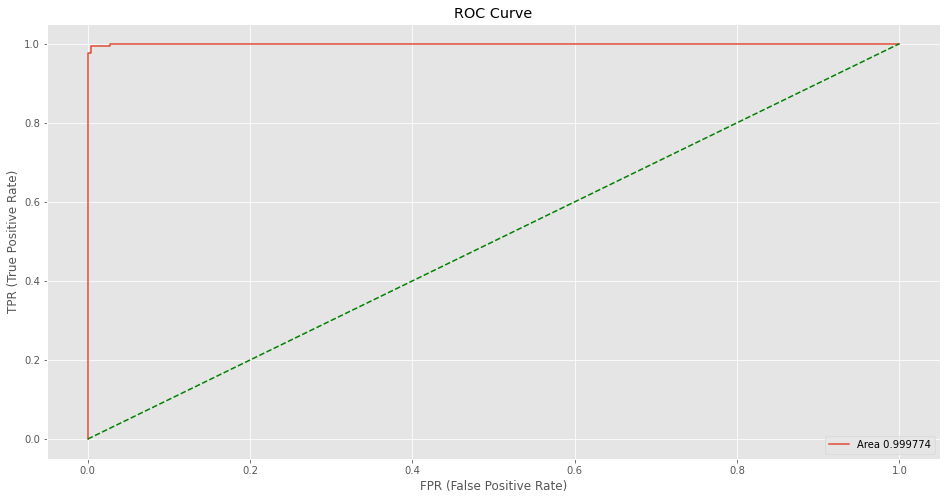


Details About Test Data
Accuracy is 0.9734513274336283
Confusion Matrix 
[[69  2]
 [ 1 41]]


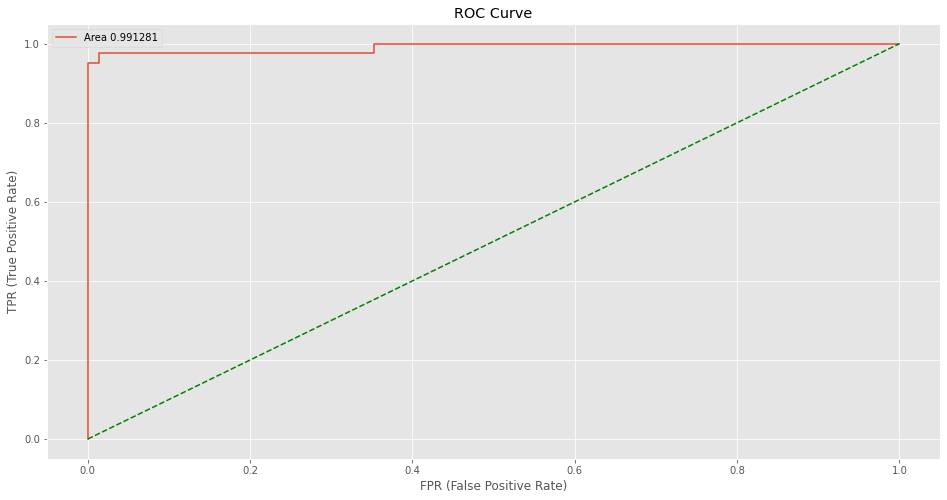


Overall Summary(After taking Means)
          accuracy  precision    recall  f1_score       AUC
Training  0.977632   0.977646  0.977632  0.977603  0.974931
Test      0.959587   0.960140  0.959587  0.959629  0.957467


In [156]:
print('\nAverage Scores After performing Monte Carlo 30 times')
print('\nDetails About Training Data')
    
print_details(train_data_y, predicted_y_train, predicted_y_prob_train, temp_dict_train)
    
print('\nDetails About Test Data')
print_details(test_data_y, predicted_y_test, predicted_y_prob_test, temp_dict_test)

print('\nOverall Summary(After taking Means)')
overall_result = pd.concat([train_results, test_results], axis=1).T
overall_result = overall_result.set_index(pd.Series(['Training', 'Test']))
print(overall_result)
summary['semi_supervised_svm']=overall_result

## *Question 1b.iii) Unsupervised Learning*

We can fix the number of iteration(n_init parameter) to ensure that we are not trapped in a local minimum.
Here I have fixed the number of iterations to be 10.

In [211]:

def perform_operations(centers_of_clusters, c, cluster_labels,d):
    distance,probablity = np.ndarray((c.shape[0],)),np.ndarray((c.shape[0], 2))
    for i, p in enumerate(c):
        center = centers_of_clusters[cluster_labels[i]]
        distance[i] = np.linalg.norm(p - center)
        
        probablity[i, 0] = np.linalg.norm(p - centers_of_clusters[0])
        probablity[i, 1] = np.linalg.norm(p - centers_of_clusters[1])
    
    probablity = softmax(probablity, axis=1).astype(np.float64)
    
    assign_label_to_cluster = np.ndarray((2,), dtype='int')
    
    major_label_in_cluster = cluster_labels.copy()

    for c_number in range(2):
        indices, = np.where(cluster_labels == c_number)
        
        first_thirty = sorted(indices.tolist(), key=lambda p : distance[p])
        first_thirty=first_thirty[:30]
        
        majority_label = d.iloc[first_thirty].value_counts().index[0]
        major_label_in_cluster[indices] = majority_label
        assign_label_to_cluster[majority_label] = c_number
        
    return distance, probablity,assign_label_to_cluster, major_label_in_cluster


In [232]:
def monte_carlo_un_supervised_kmeans(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r):
    
    start = t.time()
    
    for i in range(30):
        train_data_x,train_data_y,test_data_x,test_data_y = get_train_test_data(data,i)
        
        norm = Normalizer()
        train_data_x = norm.fit_transform(train_data_x)
        test_data_x = norm.transform(test_data_x)
        
        # we are fixing the number of iterations to avoid the local minima
        result_of_k_means = KMeans(n_clusters=2, n_init = 10, random_state=i).fit(train_data_x)

        cluster_labels_of_train_data = result_of_k_means.predict(train_data_x)

        
        distance, predicted_y_prob_train,assigned_cluster_label, predicted_y_train=perform_operations(result_of_k_means.cluster_centers_, train_data_x, cluster_labels_of_train_data,train_data_y)
        
        predicted_y_prob_train=predicted_y_prob_train[:,assigned_cluster_label[0]]
        
        train_details = classification_report(train_data_y, predicted_y_train, output_dict=True)
        fpr, tpr,_ = roc_curve(train_data_y, predicted_y_train, pos_label=1)
        temp_dict_train={'accuracy':train_details['accuracy'],'precision':train_details['weighted avg']['precision'],'recall':train_details['weighted avg']['recall'],'f1_score':train_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        train_r=train_r.append(temp_dict_train, ignore_index=True)
        
        cluster_labels_of_test_data = result_of_k_means.predict(test_data_x)
        
        distance, predicted_y_prob_test,assigned_cluster_label, predicted_y_test=perform_operations(result_of_k_means.cluster_centers_, test_data_x, cluster_labels_of_test_data,test_data_y)
        
        predicted_y_prob_test=predicted_y_prob_test[:,assigned_cluster_label[0]]
        
        test_details = classification_report(test_data_y, predicted_y_test, output_dict=True)
        fpr, tpr,_ = roc_curve(test_data_y, predicted_y_test, pos_label=1)
        temp_dict_test={'accuracy':test_details['accuracy'],'precision':test_details['weighted avg']['precision'],'recall':test_details['weighted avg']['recall'],'f1_score':test_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        test_r=test_r.append(temp_dict_test, ignore_index=True)
        
        
        
        print('Iteration: ',i+1)
        print('Train Accuracy: ',temp_dict_train['accuracy'],'Test Accuracy: ',temp_dict_test['accuracy'])
        
        #print("Best Hyper-Parameters found:")
        #print(clf.best_params_, "\n")
    train_r = train_r.apply(lambda p: p.mean(), axis=0)
    test_r = test_r.apply(lambda p: p.mean(), axis=0)
    
    end =t.time()
    print("Time Taken for Execution:",end-start)
    
    return train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_r,test_r

In [235]:
col_data =['accuracy', 'precision', 'recall', 'f1_score', 'AUC']
train_r,test_r  = pd.DataFrame(columns=col_data),pd.DataFrame(columns=col_data)
train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_results,test_results=monte_carlo_un_supervised_kmeans(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r)

Iteration:  1
Train Accuracy:  0.8903508771929824 Test Accuracy:  0.8495575221238938
Iteration:  2
Train Accuracy:  0.8991228070175439 Test Accuracy:  0.9026548672566371
Iteration:  3
Train Accuracy:  0.881578947368421 Test Accuracy:  0.911504424778761
Iteration:  4
Train Accuracy:  0.8903508771929824 Test Accuracy:  0.8495575221238938
Iteration:  5
Train Accuracy:  0.8903508771929824 Test Accuracy:  0.8849557522123894
Iteration:  6
Train Accuracy:  0.8859649122807017 Test Accuracy:  0.9026548672566371
Iteration:  7
Train Accuracy:  0.8925438596491229 Test Accuracy:  0.8761061946902655
Iteration:  8
Train Accuracy:  0.8881578947368421 Test Accuracy:  0.8938053097345132
Iteration:  9
Train Accuracy:  0.8859649122807017 Test Accuracy:  0.9026548672566371
Iteration:  10
Train Accuracy:  0.8969298245614035 Test Accuracy:  0.8495575221238938
Iteration:  11
Train Accuracy:  0.8903508771929824 Test Accuracy:  0.9203539823008849
Iteration:  12
Train Accuracy:  0.8925438596491229 Test Accuracy:


Average Scores After performing Monte Carlo 30 times

Details About Training Data
Accuracy is 0.8793859649122807
Confusion Matrix 
[[282   4]
 [ 51 119]]


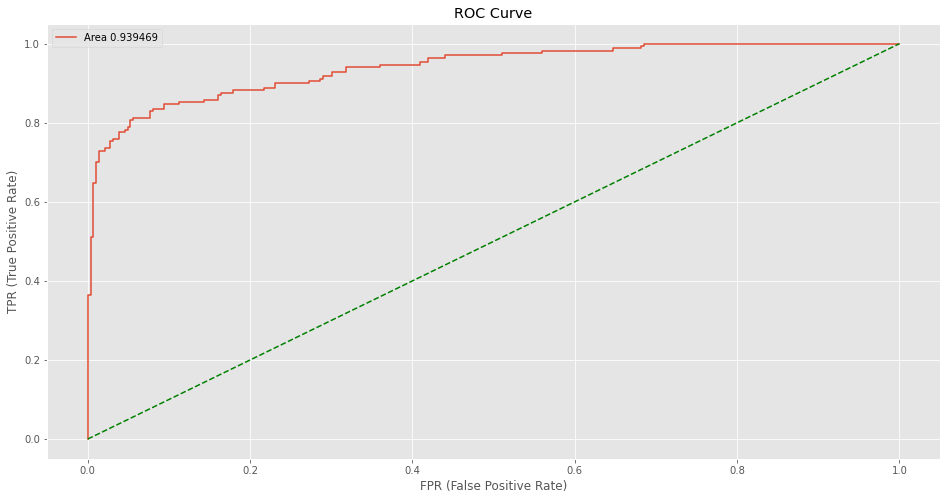


Details About Test Data
Accuracy is 0.8849557522123894
Confusion Matrix 
[[69  2]
 [11 31]]


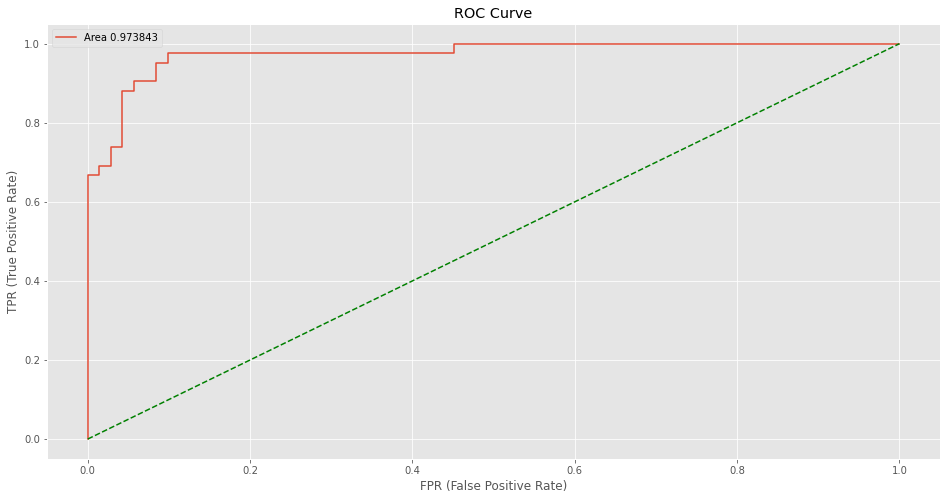


Overall Summary(After taking Means)
          accuracy  precision    recall  f1_score       AUC
Training  0.886257   0.895390  0.886257  0.882221  0.853933
Test      0.891150   0.901128  0.891150  0.886880  0.859244


In [236]:
print('\nAverage Scores After performing Monte Carlo 30 times')
print('\nDetails About Training Data')
    
print_details(train_data_y, predicted_y_train, predicted_y_prob_train, temp_dict_train)
    
print('\nDetails About Test Data')
print_details(test_data_y, predicted_y_test, predicted_y_prob_test, temp_dict_test)

print('\nOverall Summary(After taking Means)')
overall_result = pd.concat([train_results, test_results], axis=1).T
overall_result = overall_result.set_index(pd.Series(['Training', 'Test']))
print(overall_result)
summary['unsupervised_kmeans']=overall_result

## *Question 1b.iv) Spectral Clustering*

#### *reference:  https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/*
</br></br>1. Spectral clustering treats data clustering as a graph partitioning problem. It doesn't make any assumptions about the form of the data clusters.
</br></br>2. Spectral clustering is an EDA technique that reduces complex multidimensional datasets into clusters of similar data in rarer dimensions.
</br></br>3. The main outline is to cluster the all spectrum of unorganized data points into multiple groups based upon their uniqueness. Spectral Clustering uses the connectivity approach to clustering, wherein communities of data points that are connected or immediately next to each other are identified in a graph.

In [244]:
def compute_cluster_centers(train_data_x,cluster_labels_of_train_data):
    centers = []
    for c in range(2):
        temp=np.mean(train_data_x[cluster_labels_of_train_data==c],axis = 0).tolist()
        centers.append(temp)
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_data_x, cluster_labels_of_train_data)
    return knn,centers

def monte_carlo_spectral(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r):
    
    start = t.time()
    
    for i in range(30):
        
        train_data_x,train_data_y,test_data_x,test_data_y = get_train_test_data(data,i)
        
        norm = Normalizer()
        train_data_x = norm.fit_transform(train_data_x)
        test_data_x = norm.transform(test_data_x)
        
        
        cluster_labels_of_train_data = SpectralClustering(n_clusters=2, assign_labels='kmeans',affinity='rbf', eigen_tol = 1e-2,eigen_solver = 'arpack', random_state=1234).fit_predict(train_data_x)
        result_of_knn,centers=compute_cluster_centers(train_data_x,cluster_labels_of_train_data)
        cluster_labels_of_train_data = result_of_knn.predict(train_data_x)
        distance, predicted_y_prob_train,assigned_cluster_label, predicted_y_train=perform_operations(centers, train_data_x, cluster_labels_of_train_data,train_data_y)
        
        predicted_y_prob_train=predicted_y_prob_train[:,assigned_cluster_label[0]]
        
        train_details = classification_report(train_data_y, predicted_y_train, output_dict=True)
        fpr, tpr,_ = roc_curve(train_data_y, predicted_y_train, pos_label=1)
        temp_dict_train={'accuracy':train_details['accuracy'],'precision':train_details['weighted avg']['precision'],'recall':train_details['weighted avg']['recall'],'f1_score':train_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        train_r=train_r.append(temp_dict_train, ignore_index=True)
        
        cluster_labels_of_test_data = result_of_knn.predict(test_data_x)
        
        
        distance, predicted_y_prob_test,assigned_cluster_label, predicted_y_test=perform_operations(centers, test_data_x, cluster_labels_of_test_data,test_data_y)
        
        predicted_y_prob_test=predicted_y_prob_test[:,assigned_cluster_label[0]]
        
        test_details = classification_report(test_data_y, predicted_y_test, output_dict=True)
        fpr, tpr,_ = roc_curve(test_data_y, predicted_y_test, pos_label=1)
        temp_dict_test={'accuracy':test_details['accuracy'],'precision':test_details['weighted avg']['precision'],'recall':test_details['weighted avg']['recall'],'f1_score':test_details['weighted avg']['f1-score'],'AUC':auc(fpr, tpr)}
        test_r=test_r.append(temp_dict_test, ignore_index=True)
        
        
        
        print('Iteration: ',i+1)
        print('Train Accuracy: ',temp_dict_train['accuracy'],'Test Accuracy: ',temp_dict_test['accuracy'])
        
        #print("Best Hyper-Parameters found:")
        #print(clf.best_params_, "\n")
    train_r = train_r.apply(lambda p: p.mean(), axis=0)
    test_r = test_r.apply(lambda p: p.mean(), axis=0)
    
    end =t.time()
    print("Time Taken for Execution:",end-start)
    
    return train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_r,test_r


In [245]:
col_data =['accuracy', 'precision', 'recall', 'f1_score', 'AUC']
train_r,test_r  = pd.DataFrame(columns=col_data),pd.DataFrame(columns=col_data)
train_data_y,predicted_y_train, predicted_y_prob_train, temp_dict_train,test_data_y,predicted_y_test, predicted_y_prob_test, temp_dict_test,train_results,test_results=monte_carlo_spectral(train_data_x, train_data_y, test_data_x, test_data_y,train_r,test_r)

Iteration:  1
Train Accuracy:  0.8903508771929824 Test Accuracy:  0.8584070796460177
Iteration:  2
Train Accuracy:  0.8881578947368421 Test Accuracy:  0.9026548672566371
Iteration:  3
Train Accuracy:  0.8771929824561403 Test Accuracy:  0.8761061946902655
Iteration:  4
Train Accuracy:  0.8859649122807017 Test Accuracy:  0.8230088495575221
Iteration:  5
Train Accuracy:  0.881578947368421 Test Accuracy:  0.8849557522123894
Iteration:  6
Train Accuracy:  0.8837719298245614 Test Accuracy:  0.8672566371681416
Iteration:  7
Train Accuracy:  0.8881578947368421 Test Accuracy:  0.8584070796460177
Iteration:  8
Train Accuracy:  0.8837719298245614 Test Accuracy:  0.9026548672566371
Iteration:  9
Train Accuracy:  0.875 Test Accuracy:  0.9026548672566371
Iteration:  10
Train Accuracy:  0.8881578947368421 Test Accuracy:  0.8230088495575221
Iteration:  11
Train Accuracy:  0.881578947368421 Test Accuracy:  0.8938053097345132
Iteration:  12
Train Accuracy:  0.8881578947368421 Test Accuracy:  0.867256637


Average Scores After performing Monte Carlo 30 times

Details About Training Data
Accuracy is 0.8771929824561403
Confusion Matrix 
[[282   4]
 [ 52 118]]


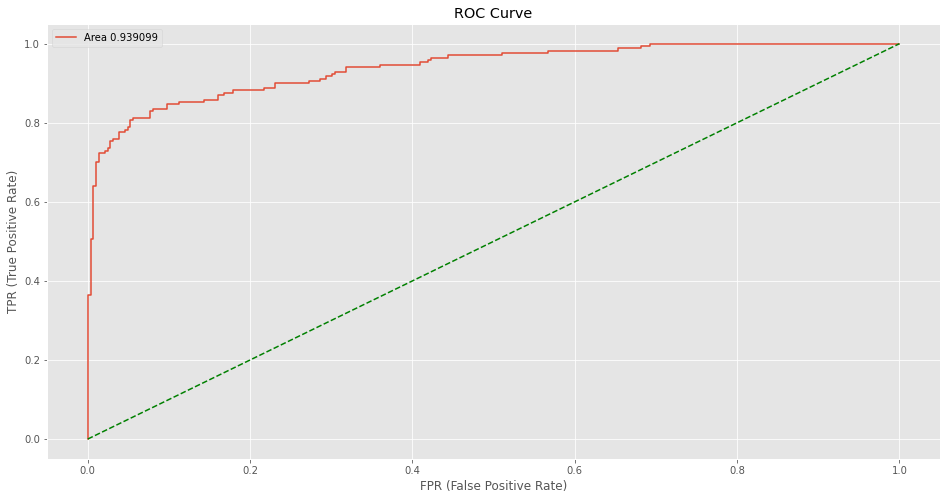


Details About Test Data
Accuracy is 0.8849557522123894
Confusion Matrix 
[[69  2]
 [11 31]]


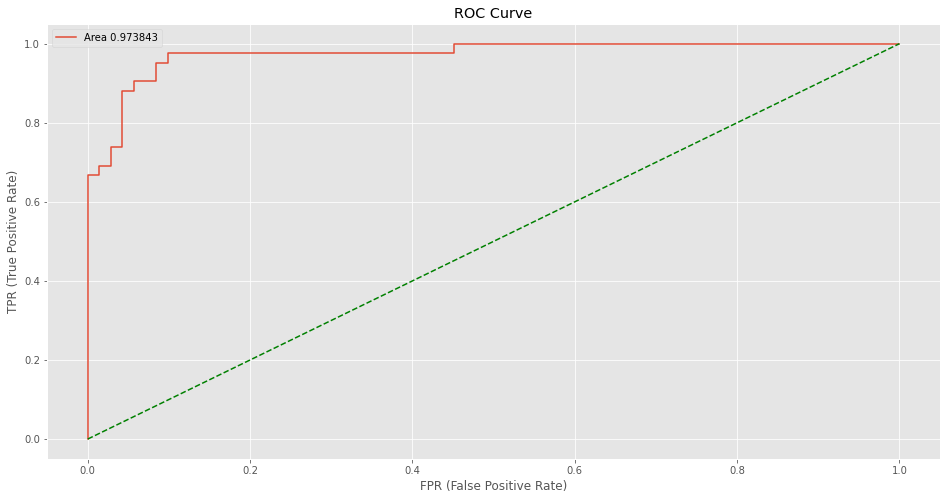


Overall Summary(After taking Means)
          accuracy  precision    recall  f1_score       AUC
Training  0.881725   0.891870  0.881725  0.877226  0.847735
Test      0.879646   0.891289  0.879646  0.874297  0.844254


In [246]:
print('\nAverage Scores After performing Monte Carlo 30 times')
print('\nDetails About Training Data')
    
print_details(train_data_y, predicted_y_train, predicted_y_prob_train, temp_dict_train)
    
print('\nDetails About Test Data')
print_details(test_data_y, predicted_y_test, predicted_y_prob_test, temp_dict_test)

print('\nOverall Summary(After taking Means)')
overall_result = pd.concat([train_results, test_results], axis=1).T
overall_result = overall_result.set_index(pd.Series(['Training', 'Test']))
print(overall_result)
summary['unsupervised_spectral']=overall_result

## *Question 1b.v) Compare the results*

In [252]:
for i in summary:
    print(i,end='\n\n')
    print(summary[i],end='\n\n')

supervised_l1_penalized_svm

          accuracy  precision    recall  f1_score       AUC
Training  0.984137   0.984163  0.984137  0.984118  0.981907
Test      0.958702   0.959306  0.958702  0.958703  0.955952

semi_supervised_svm

          accuracy  precision    recall  f1_score       AUC
Training  0.977632   0.977646  0.977632  0.977603  0.974931
Test      0.959587   0.960140  0.959587  0.959629  0.957467

unsupervised_kmeans

          accuracy  precision    recall  f1_score       AUC
Training  0.886257   0.895390  0.886257  0.882221  0.853933
Test      0.891150   0.901128  0.891150  0.886880  0.859244

unsupervised_spectral

          accuracy  precision    recall  f1_score       AUC
Training  0.881725   0.891870  0.881725  0.877226  0.847735
Test      0.879646   0.891289  0.879646  0.874297  0.844254



</br></br> From the summary, we observe that the results of supervised learning and semi-supervised learning are close to each other.</br> We might expect the supervised learning on the full data set to perform better than the semi-supervised one with half of the data set labeled, but it didn't happen in our case.</br> This might have occurred because we performed the Monte-Carlo simulation just 30 times, when we perform it more times we might get the expected results.

</br> As expected, unsupervised learning underperforms or has poor results compared to supervised learning. This is true in our case also.


## *Question 2.) Active Learning Using Support Vector Machines*

## *Question 2a.) Download the banknote authentication Data Set*

In [267]:
bank_data = pd.read_csv('../data/data_banknote_authentication.txt', header = None,names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [275]:
def bank_get_train_test_data(bank_data):
    all_test_indices=np.random.choice(bank_data.shape[0],472,replace=False)
    all_train_indices =[]
    for i in range(bank_data.shape[0]):
        if i not in all_test_indices:
            all_train_indices.append(i)
    all_train_indices=np.array(all_train_indices)
    #print(len(all_train_indices))
    #print(len(all_test_indices))
    return bank_data.iloc[all_train_indices,:-1].copy(),bank_data.iloc[all_train_indices, -1].copy(),bank_data.iloc[all_test_indices, :-1].copy(),bank_data.iloc[all_test_indices, -1].copy()

bank_train_data_x,bank_train_data_y,bank_test_data_x,bank_test_data_y=bank_get_train_test_data(bank_data)


## *Question 2b.) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.*

## *Question 2b.i) Perform Passive Learning.*

In [292]:
def monte_carlo_passive_learning(bank_data):
    
    start = t.time()
    
    tuned_parameters = {'C' : np.logspace(1, 5, 10)}
    
    dict_ = {'param_grid' : tuned_parameters,'scoring' : 'f1_weighted','n_jobs' : -1}
    
    all_accuracy_list=[]
    for i in range(50):
        dict_['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        bank_train_data_x,bank_train_data_y,bank_test_data_x,bank_test_data_y=bank_get_train_test_data(bank_data)
        accuracy,remaining_indices,all_indices=[],[],np.array([i for i in range(bank_train_data_x.shape[0])])
        norm = Normalizer()
        bank_train_data_x = norm.fit_transform(bank_train_data_x)
        bank_test_data_x = norm.transform(bank_test_data_x)
 
        while len(all_indices) > 0:
    
            np.random.shuffle(all_indices)
            pool= all_indices[:10]
            all_indices=all_indices[10:]
            remaining_indices.extend(pool)
        
            remaining_train_data_x = bank_train_data_x[remaining_indices]
            remaining_train_data_y = bank_train_data_y.iloc[remaining_indices]
        
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False,max_iter = 100000), **dict_)
            clf.fit(remaining_train_data_x, remaining_train_data_y)
        
            predicted_y_test = clf.predict(bank_test_data_x)
            test_details = classification_report(bank_test_data_y, predicted_y_test, output_dict=True)
            accuracy.append(test_details['accuracy'])
    
     
        all_accuracy_list.append(accuracy)
        print('Iteration: ',i+1)
        print('Test Accuracy with all data points(900): ',accuracy[-1])
        
    
    end =t.time()
    print("Time Taken for Execution:",end-start)
    
    return np.array(all_accuracy_list)


In [293]:
all_accuracy_list=monte_carlo_passive_learning(bank_data)
all_accuracy_list = np.mean(all_accuracy_list, axis=0)

Iteration:  1
Test Accuracy with all data points(900):  0.9915254237288136
Iteration:  2
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  3
Test Accuracy with all data points(900):  0.9915254237288136
Iteration:  4
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  5
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  6
Test Accuracy with all data points(900):  0.989406779661017
Iteration:  7
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  8
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  9
Test Accuracy with all data points(900):  0.989406779661017
Iteration:  10
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  11
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  12
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  13
Test Accuracy with all data points(900):  0.9915254237288136
Iteration:  14
Test Acc

## *Question 2b.ii) Perform Active Learning.*

In [300]:
def monte_carlo_active_learning(bank_data):
    
    start = t.time()
    
    tuned_parameters = {'C' : np.logspace(1, 5, 10)}
    
    dict_ = {'param_grid' : tuned_parameters,'scoring' : 'f1_weighted','n_jobs' : -1}
    
    all_accuracy_list=[]
    for i in range(50):
        dict_['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        bank_train_data_x,bank_train_data_y,bank_test_data_x,bank_test_data_y=bank_get_train_test_data(bank_data)
        
        accuracy,remaining_indices,all_indices=[],[],np.array([i for i in range(bank_train_data_x.shape[0])])
        
        norm = Normalizer()
        bank_train_data_x = norm.fit_transform(bank_train_data_x)
        bank_test_data_x = norm.transform(bank_test_data_x)
        
        np.random.shuffle(all_indices)
        pool = all_indices[:10]
        all_indices = all_indices[10:]
        remaining_indices.extend(pool)
        while len(remaining_indices) <= 900:
            
            remaining_train_data_x=bank_train_data_x[remaining_indices]
            remaining_train_data_y = bank_train_data_y.iloc[remaining_indices]
            
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False,max_iter = 200000), **dict_)
            clf.fit(remaining_train_data_x, remaining_train_data_y)
            
            predicted_y_test = clf.predict(bank_test_data_x)
            test_details = classification_report(bank_test_data_y, predicted_y_test, output_dict=True)
            accuracy.append(test_details['accuracy'])
        
            if len(all_indices) == 0:
                break
        
            distances = clf.decision_function(bank_train_data_x[all_indices])
            content_sorted = np.array([i for i in range(len(all_indices))])

            content_sorted=sorted(content_sorted, key=lambda p : abs(distances[p]))
            
            all_indices = all_indices[content_sorted]
            pool=all_indices[:10]
            all_indices = all_indices[10:]
            remaining_indices.extend(pool)
    
        all_accuracy_list.append(accuracy)
        print('Iteration: ',i+1)
        print('Test Accuracy with all data points(900): ',accuracy[-1])
        
    
    end =t.time()
    print("Time Taken for Execution:",end-start)
    
    return np.array(all_accuracy_list)


In [305]:
all_accuracy_list_active=monte_carlo_active_learning(bank_data)
all_accuracy_list_active = np.mean(all_accuracy_list_active, axis=0)

Iteration:  1
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  2
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  3
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  4
Test Accuracy with all data points(900):  0.9915254237288136
Iteration:  5
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  6
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  7
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  8
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  9
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  10
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  11
Test Accuracy with all data points(900):  0.9957627118644068
Iteration:  12
Test Accuracy with all data points(900):  0.9936440677966102
Iteration:  13
Test Accuracy with all data points(900):  0.9915254237288136
Iteration:  14
Test A

## *Question 2c) Plot the Learning Curve.*

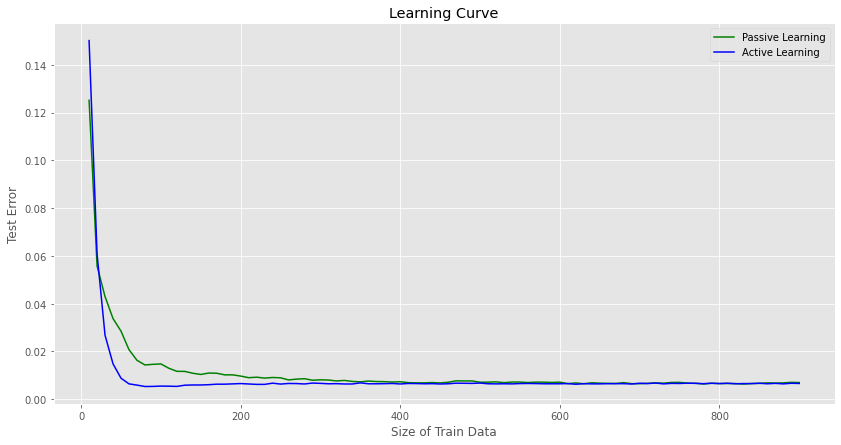

In [308]:
error_list,error_list_active = 1 - all_accuracy_list,1 - all_accuracy_list_active

x=np.array([i*10 for i in range(1,91)])
fig, axes = plt.subplots(figsize=(14, 7))
axes.plot(x, error_list, c='green',label='Passive Learning')
axes.plot(x, error_list_active, c='blue',label='Active Learning')
axes.set_xlabel("Size of Train Data")
axes.set_ylabel("Test Error")
axes.legend()
axes.set_title("Learning Curve")
plt.show()

</br> As expected as the training data size increases the test error decreases.
</br> When the size of the training data is relatively small, active learning tends to perform better than passive learning because it chooses the closest points to the hyperplane.
</br> Passive learning on the other hand chooses random points.
</br> As the training data size becomes very large we can observe that both active learning and passive learning perform equally well, they don't have much difference in their performance.